In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


Plot for Johor first

In [3]:
population_data_johor = population_data[(population_data["state"] == "Johor") & 
                                        (population_data["age"] != 'overall')].copy()
population_data_johor["year"] = pd.to_datetime(population_data_johor["date"]).dt.year

population_data_johor.head()

,state,date,sex,age,ethnicity,population,year
1,Johor,1970-01-01,both,0-4,overall,210.1,1970
2,Johor,1970-01-01,both,5-9,overall,215.7,1970
3,Johor,1970-01-01,both,10-14,overall,192.2,1970
4,Johor,1970-01-01,both,15-19,overall,152.8,1970
5,Johor,1970-01-01,both,20-24,overall,110.7,1970


Define age map as convention differs

In [4]:
AGE_MAP = {
    "0-4": "young",
    "5-9": "young",
    "10-14": "young",
    "15-19": "working",
    "20-24": "working",
    "25-29": "working",
    "30-34": "working",
    "35-39": "working",
    "40-44": "working",
    "45-49": "working",
    "50-54": "working",
    "55-59": "working",
    "60-64": "working",
    "65-69": "old",
    "70-74": "old",
    "75-79": "old",
    "80+": "old"
}

population_data_johor["age_group"] = population_data_johor["age"].map(AGE_MAP)
population_data_johor.head()

,state,date,sex,age,ethnicity,population,year,age_group
1,Johor,1970-01-01,both,0-4,overall,210.1,1970,young
2,Johor,1970-01-01,both,5-9,overall,215.7,1970,young
3,Johor,1970-01-01,both,10-14,overall,192.2,1970,young
4,Johor,1970-01-01,both,15-19,overall,152.8,1970,working
5,Johor,1970-01-01,both,20-24,overall,110.7,1970,working


In [5]:
combined_johor = population_data_johor.groupby(
    ["state", "year", "sex", "age_group"]
).sum().reset_index()
combined_johor.head()

,state,year,sex,age_group,date,age,ethnicity,population
0,Johor,1970,both,old,1970-01-01,65-69,overall,18.0
1,Johor,1970,both,working,1970-01-011970-01-011970-01-011970-01-011970-0...,15-1920-2425-2930-3435-3940-4445-4950-5455-596...,overalloveralloveralloveralloveralloverallover...,665.1
2,Johor,1970,both,young,1970-01-011970-01-011970-01-01,0-45-910-14,overalloveralloverall,618.0
3,Johor,1970,female,old,1970-01-01,65-69,overall,7.6
4,Johor,1970,female,working,1970-01-011970-01-011970-01-011970-01-011970-0...,15-1920-2425-2930-3435-3940-4445-4950-5455-596...,overalloveralloveralloveralloveralloverallover...,334.0


In [6]:
overall_johor_data = combined_johor.drop(["date", "age", "ethnicity"], axis = 1).copy()
overall_johor_data.head()

,state,year,sex,age_group,population
0,Johor,1970,both,old,18.0
1,Johor,1970,both,working,665.1
2,Johor,1970,both,young,618.0
3,Johor,1970,female,old,7.6
4,Johor,1970,female,working,334.0


In [7]:
overall_johor_data['age_group'].unique()

array(['old', 'working', 'young'], dtype=object)

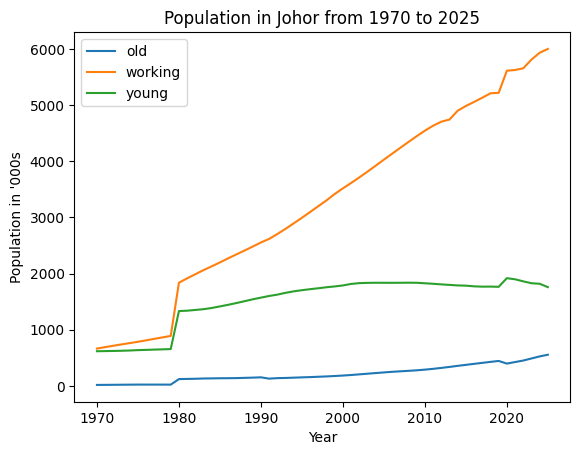

In [8]:
fig, ax = plt.subplots()

for age_group in overall_johor_data['age_group'].unique():
    age_group_data = overall_johor_data[(overall_johor_data['age_group'] == age_group)
                                        & (overall_johor_data['sex'] == 'both')].copy()
    ax.plot("year", "population", data = age_group_data, label = age_group)

ax.set(xlabel= "Year", ylabel= "Population in '000s", title= "Population in Johor from 1970 to 2025")
ax.legend()

Plot for male

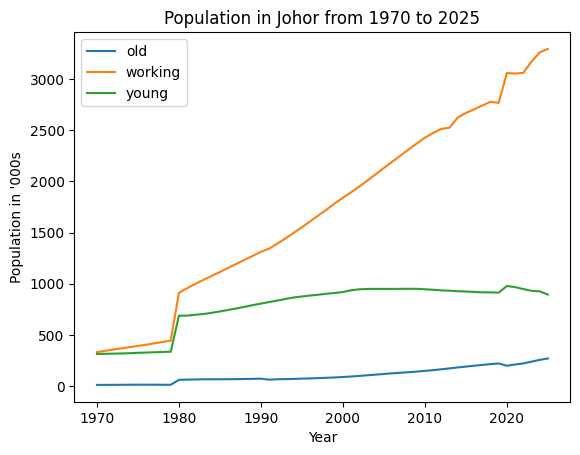

In [9]:
fig, ax = plt.subplots()

for age_group in overall_johor_data['age_group'].unique():
    age_group_data = overall_johor_data[(overall_johor_data['age_group'] == age_group)
                                        & (overall_johor_data['sex'] == 'male')].copy()
    ax.plot("year", "population", data = age_group_data, label = age_group)

ax.set(xlabel= "Year", ylabel= "Population in '000s", title= "Population in Johor from 1970 to 2025")
ax.legend()

Plot for female

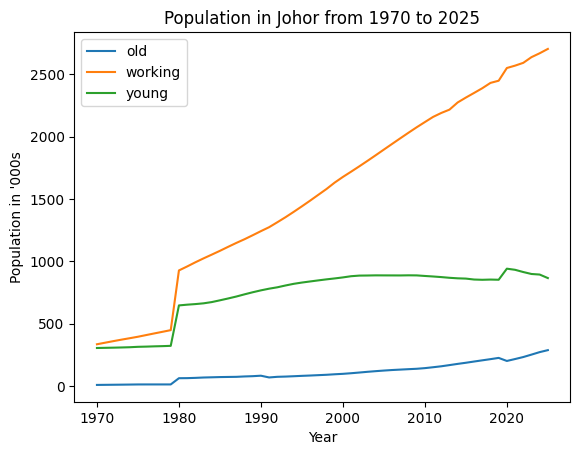

In [10]:
fig, ax = plt.subplots()

for age_group in overall_johor_data['age_group'].unique():
    age_group_data = overall_johor_data[(overall_johor_data['age_group'] == age_group)
                                        & (overall_johor_data['sex'] == 'female')].copy()
    ax.plot("year", "population", data = age_group_data, label = age_group)

ax.set(xlabel= "Year", ylabel= "Population in '000s", title= "Population in Johor from 1970 to 2025")
ax.legend()

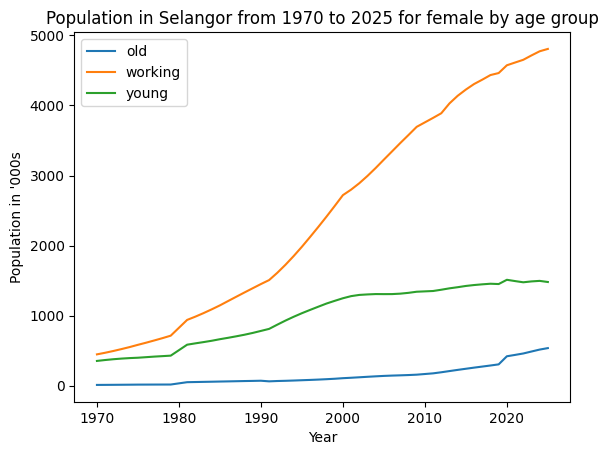

In [35]:
BOUNDARY_CHANGES = {
    "Selangor": [1980, 2010],
    "Sabah": [1991]
}

AGE_MAP = {
    "0-4": "young",
    "5-9": "young",
    "10-14": "young",
    "15-19": "working",
    "20-24": "working",
    "25-29": "working",
    "30-34": "working",
    "35-39": "working",
    "40-44": "working",
    "45-49": "working",
    "50-54": "working",
    "55-59": "working",
    "60-64": "working",
    "65-69": "old",
    "70-74": "old",
    "75-79": "old",
    "80+": "old"
}

def remove_boundary_years(df, state):
    years_to_drop = BOUNDARY_CHANGES.get(state, [])
    return df[~df["year"].isin(years_to_drop)]

def filter_population_state_year(state, gender = None, start_year = None):
    state = state.strip().title()

    df = population_data[(population_data["state"] == state) & (population_data['age'] != 'overall')].copy()
    
    df["year"] = pd.to_datetime(df["date"]).dt.year
    df["age_group"] = df["age"].map(AGE_MAP)
    

    df = df.groupby(["state", "year", "sex", "age_group"]).sum().reset_index()
    df = df.drop(["date", "age", "ethnicity"], axis = 1).copy()

    if gender is not None:
        df = df[df["sex"] == gender]
    else: 
        df = df[df["sex"] == "both"]

    if start_year is not None:
        df = df[df["year"] >= start_year]
    
    return df.copy()

def plot_overall_population(state, gender = None, start_year = None):
    df = filter_population_state_year(state, gender, start_year)
    df = remove_boundary_years(df, state)
    fig, ax = plt.subplots()

    first_year = df["year"].min()

    if gender is None:
        for age_group in df['age_group'].unique():
            age_group_data = df[(df['age_group'] == age_group)
                                        & (df['sex'] == 'both')].copy()
            ax.plot("year", "population", data = age_group_data, label = age_group)
        
        ax.set(
            xlabel="Year",
            ylabel="Population in '000s",
            title=f"Population in {state} from {first_year} to 2025 by age group"
        )

        ax.legend()
    else:  
        for age_group in df['age_group'].unique():
            age_group_data = df[(df['age_group'] == age_group)].copy()
            ax.plot("year", "population", data = age_group_data, label = age_group)

        ax.set(
            xlabel="Year",
            ylabel="Population in '000s",
            title=f"Population in {state} from {first_year} to 2025 for {gender} by age group"
        )
        
        ax.legend()

plot_overall_population("Selangor", gender="female")